<a href="https://colab.research.google.com/github/sonchangwoo95/github-slideshow/blob/master/LSTM_SS_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [27]:
data = pd.read_csv('sample_data/005930.KS_filter.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-04,25580,26100,25580,26100,22694.39844,9402300
1,2016-04-05,25980,25980,25200,25200,21911.83789,11815950
2,2016-04-06,25380,25820,25360,25700,22346.59375,9211700
3,2016-04-07,26000,26000,25160,25380,22068.34766,12939750
4,2016-04-08,25380,25380,24800,24920,21668.37109,12593400


In [28]:
high_prices = data['High'].values
# low_prices = data['Low'].values
# mid_prices = (high_prices + low_prices) / 2

In [33]:
high_prices

array([26100, 25980, 25820, ..., 82700, 83000, 85200])

In [29]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(high_prices) - sequence_length):
    result.append(high_prices[index: index + sequence_length])
    # result.append(mid_prices[index: index + sequence_length])



In [30]:
# result.head()
result

[array([26100, 25980, 25820, 26000, 25380, 25420, 25620, 26040, 26200,
        26100, 25920, 26000, 26020, 25880, 25700, 26100, 26000, 26000,
        25340, 25240, 25400, 25800, 26000, 26000, 25980, 25840, 25620,
        25260, 25300, 25420, 25540, 25600, 25720, 25780, 25960, 26060,
        26020, 25940, 26000, 26820, 27440, 27580, 28040, 28380, 28600,
        28500, 27920, 27720, 28320, 28340, 28700]),
 array([25980, 25820, 26000, 25380, 25420, 25620, 26040, 26200, 26100,
        25920, 26000, 26020, 25880, 25700, 26100, 26000, 26000, 25340,
        25240, 25400, 25800, 26000, 26000, 25980, 25840, 25620, 25260,
        25300, 25420, 25540, 25600, 25720, 25780, 25960, 26060, 26020,
        25940, 26000, 26820, 27440, 27580, 28040, 28380, 28600, 28500,
        27920, 27720, 28320, 28340, 28700, 28960]),
 array([25820, 26000, 25380, 25420, 25620, 26040, 26200, 26100, 25920,
        26000, 26020, 25880, 25700, 26100, 26000, 26000, 25340, 25240,
        25400, 25800, 26000, 26000, 25980, 2

In [31]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    # normalized_window = [(float(p)) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

result

array([[ 0.        , -0.0045977 , -0.01072797, ...,  0.08505747,
         0.08582375,  0.09961686],
       [ 0.        , -0.00615858,  0.00076982, ...,  0.09083911,
         0.10469592,  0.11470362],
       [ 0.        ,  0.00697134, -0.01704105, ...,  0.11154144,
         0.12161115,  0.12238575],
       ...,
       [ 0.        ,  0.02      , -0.03      , ..., -0.09333333,
        -0.09222222, -0.08555556],
       [ 0.        , -0.04901961, -0.04139434, ..., -0.11002179,
        -0.10348584, -0.09912854],
       [ 0.        ,  0.00801833,  0.01947308, ..., -0.05727377,
        -0.05269187, -0.04925544]])

In [32]:
# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1058, 50, 1), (117, 50, 1))

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
106/106 [==============================] - 9s 53ms/step - loss: 2193210603.6636 - val_loss: 5773424640.0000
Epoch 2/20
106/106 [==============================] - 5s 44ms/step - loss: 2181729985.7944 - val_loss: 5772377088.0000
Epoch 3/20
106/106 [==============================] - 5s 44ms/step - loss: 2162168396.5607 - val_loss: 5771340288.0000
Epoch 4/20
106/106 [==============================] - 5s 45ms/step - loss: 2175447611.8131 - val_loss: 5770304512.0000
Epoch 5/20
106/106 [==============================] - 5s 44ms/step - loss: 2196255380.3364 - val_loss: 5769269248.0000
Epoch 6/20
106/106 [==============================] - 5s 45ms/step - loss: 2172264190.8037 - val_loss: 5768235008.0000
Epoch 7/20
106/106 [==============================] - 5s 44ms/step - loss: 2172991014.2804 - val_loss: 5767199232.0000
Epoch 8/20
106/106 [==============================] - 5s 46ms/step - loss: 2189542980.1869 - val_loss: 5766162944.0000
Epoch 9/20
106/106 [============================

In [ ]:
# 예측값을 원래단위로 환산
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    # normalized_window = [(float(p)) for p in window]
    normalized_data.append(normalized_window)

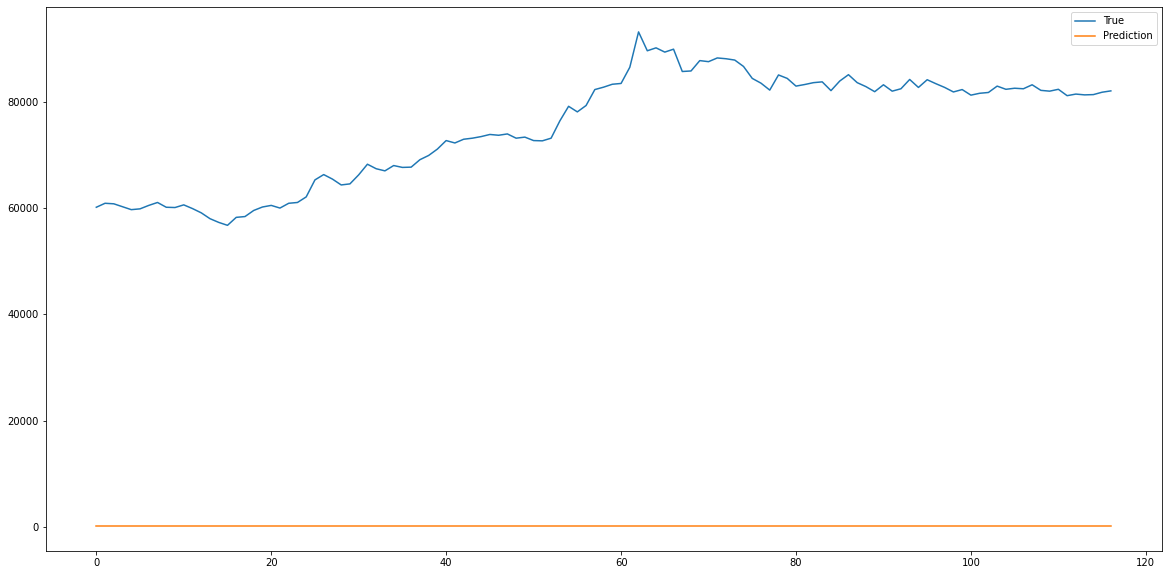

In [ ]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
# ax.plot(y_test, label='True')
# ax.plot(pred, label='Prediction')

# 표준화 이전값으로 변경을해서 그래프 표시
ax.plot(high_prices, label='True')

ax.plot(expect, label='Expect')

ax.legend()
plt.show()

# 실제추적되는 그래프가 아님